In [2]:
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt
import os


In [3]:
#Check's for PostgreSQL.py configuration file, if non, it will generate one.
#NOTICE -- Please configure API/PostgreSQL.py before running all code. Ensure it is added to 'gitignore' before running code and pushing to the repository
#ADDITIONALLY -- If the strings get renamed, simply delete 'PostgreSQL.py' and re-run this code.
# This code was grabbed from previous projects
sqlconfig = os.path.join("API","PostgreSQL.py")

if not os.path.exists(sqlconfig):
    with open(sqlconfig, 'w') as file:
        file.write("connectionString = ''")
    print(f"Configuration file has been created, please configure, restart kernel and try again.")
else:
    print(f"Configuration file already exists, importing...")
    
from API.PostgreSQL import *

Configuration file already exists, importing...


In [6]:
# Load data from the SQL server
engine = create_engine(connectionString)
Session = sessionmaker(bind=engine)
tableName = "RedWineData"

RedWineDF = pd.read_sql_table(tableName, engine)
RedWineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
RedWineDF.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

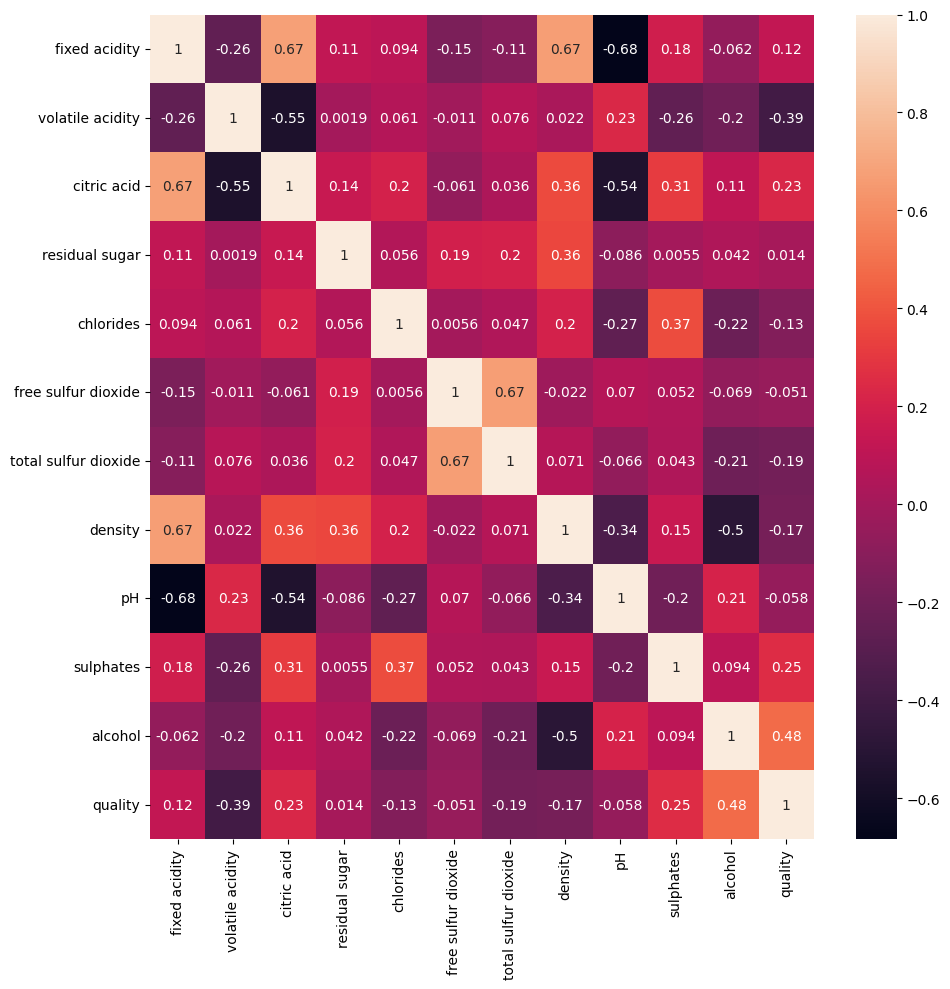

In [26]:
import seaborn as sns
# Cool correlation matrix graph
corrMatrix = RedWineDF.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.tight_layout()
plt.savefig("visualizations/CorrelationMatrix.png", dpi=300, transparent=True)
plt.show()
# Save the plot to a file with a specific DPI (dots per inch) and a custom filename



In [ ]:
# Split into X and y
X = df.drop('quality', axis=1).copy()
y = df['quality'].copy()


In [ ]:
# Import sklearn train test split
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)